<a href="https://colab.research.google.com/github/ekayulianto/ANN_Breast_Cancer/blob/master/ANN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


#Score
from sklearn.metrics import confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Import Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [3]:
 df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop('Unnamed: 32', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df = df.drop('id', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Handling Missing Value

In [9]:
import missingno as msno
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [10]:
miss_values = null_values(df)
miss_values

Dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Feature Engineering

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Label Encoding

In [13]:
labelencoder_diagnosa = LabelEncoder()
df['label_diagnosis'] = labelencoder_diagnosa.fit_transform(df.diagnosis.values)
## Note: M = 1, dan B = 0

In [14]:
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label_diagnosis
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


In [15]:
## drop kolom diagnosis
df = df.drop('diagnosis', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

## Split Data

In [16]:
X = df.drop('label_diagnosis', axis=1)
y = df['label_diagnosis']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: label_diagnosis, Length: 569, dtype: int64

### Splitting data into Training Set and Test Set (Training = 70%, Tes = 30%)

In [19]:
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
unique, counts = np.unique(y_train, return_counts=True)         #menghitung jumlah status(y) pd data training
dict(zip(unique, counts))

{0: 249, 1: 149}

## Feature Scalling (Standardization)

In [21]:
X_train_no_norm = X_train.copy()
X_test_no_norm = X_test.copy()

In [22]:
X_train_no_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.04156,0.008038,0.01843,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,0.1485,1.5630,1.035,10.080,0.008875,0.009362,0.01808,0.009199,0.01791,0.003317,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.510,0.005518,0.015620,0.01994,0.007924,0.01799,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.920,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.740,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.480,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)           ## Standard Scaller of X_train
X_test = sc.fit_transform(X_test)             ## Standard Scaller of X_test
## Output berupa numpy

In [24]:
X_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [25]:
X_test

array([[-0.17715788,  0.22140254, -0.10696857, ...,  1.39677786,
         1.14404645,  1.44477141],
       [-0.23403396,  1.26339611, -0.30309994, ..., -0.80720664,
        -0.82315205, -0.90738698],
       [ 0.00843776, -0.84922934, -0.06592787, ..., -0.47125285,
        -1.35417496, -0.9500342 ],
       ...,
       [-0.08436006, -0.18393957, -0.10308051, ...,  0.23134793,
        -0.12489141,  0.31899407],
       [-0.20709266,  0.45271189, -0.2538511 , ..., -0.86661774,
        -0.49040068, -0.97846568],
       [-1.39460537,  0.53422091, -1.38700657, ..., -1.33005467,
        -0.83866895, -0.57659762]])

## Building ANN

In [26]:
X.shape

(569, 30)

### Create First Hidden layer

In [27]:
classifier = Sequential()                                                        ## Inisialisasi ANN
classifier.add(Dense(output_dim = 16, init = 'uniform', activation='relu'))     ## Hidden layers 1, dengan node inputnya (sebanyak jumlah kolom data)     
classifier.add(Dropout(p=0.1))                                                  ## penggunaan DropOut layer untuk mencegah overfitting dengan nilai p=0.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Note:
1. output_dim = jumlah node
2. init = pemberian bobotnya
3. activation = fungsi aktivasi

### Create Second Hidden Layer

In [28]:
classifier.add(Dense(output_dim = 16, init = 'uniform', activation='relu'))     ## Hidden layers 1, dengan node inputnya (sebanyak jumlah kolom data)     
classifier.add(Dropout(p=0.1))                                                  ## penggunaan DropOut layer untuk mencegah overfitting dengan nilai p=0.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


### Create Output Layer

In [29]:
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))       ## fungsi aktivasi yg digunakan yaitu sigmoid (output = 0 atau 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


## Training ANN Model

In [30]:
## Compile ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
## loss_function (binary), optimizer(adam for stochastic gradient descent)

In [31]:
X_train.shape

(398, 30)

In [32]:
y_train.value_counts()

0    249
1    149
Name: label_diagnosis, dtype: int64

In [33]:
len(y_train)

398

In [34]:
X_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [35]:
y_train.values

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [36]:
len(y_train)

398

In [37]:
## Training ANN on the Training Set
# note untuk labels(y_train) harus dalam bentuk numpy array
classifier.fit(X_train, y_train.values, batch_size= 10, epochs=150)                    ## batch_size(jumlah sample untuk ANN melakukan training set), iterasi 150 kali

Epoch 1/150
398/398 [==============================] - 0s 465us/step - loss: 0.6816 - accuracy: 0.6935
Epoch 2/150
398/398 [==============================] - 0s 119us/step - loss: 0.5534 - accuracy: 0.9095
Epoch 3/150
398/398 [==============================] - 0s 119us/step - loss: 0.3127 - accuracy: 0.9497
Epoch 4/150
398/398 [==============================] - 0s 125us/step - loss: 0.1760 - accuracy: 0.9573
Epoch 5/150
398/398 [==============================] - 0s 161us/step - loss: 0.1230 - accuracy: 0.9724
Epoch 6/150
398/398 [==============================] - 0s 153us/step - loss: 0.1059 - accuracy: 0.9724
Epoch 7/150
398/398 [==============================] - 0s 154us/step - loss: 0.1035 - accuracy: 0.9724
Epoch 8/150
398/398 [==============================] - 0s 123us/step - loss: 0.0891 - accuracy: 0.9724
Epoch 9/150
398/398 [==============================] - 0s 152us/step - loss: 0.0886 - accuracy: 0.9799
Epoch 10/150
398/398 [==============================] - 0s 149us/step - l

## Prediksi

In [38]:
y_pred = classifier.predict(X_test)
y_pred

array([[1.0000000e+00],
       [1.9564927e-03],
       [1.3301248e-11],
       [6.2429785e-07],
       [8.0383884e-15],
       [3.7025761e-11],
       [3.2707741e-18],
       [3.1478349e-12],
       [1.1666756e-10],
       [5.0826524e-27],
       [8.8353330e-01],
       [1.1071861e-03],
       [1.3322333e-17],
       [9.9755347e-01],
       [9.9992388e-01],
       [1.0000000e+00],
       [1.9516096e-17],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.9393193e-10],
       [8.2716591e-11],
       [1.0000000e+00],
       [1.7741814e-12],
       [5.5589271e-14],
       [1.0000000e+00],
       [8.3145053e-12],
       [1.0000000e+00],
       [1.1130096e-14],
       [1.0000000e+00],
       [7.2237926e-05],
       [1.0000000e+00],
       [1.1676442e-21],
       [1.0000000e+00],
       [9.8087658e-06],
       [1.0000000e+00],
       [1.0183464e-09],
       [1.0000000e+00],
       [9.9999666e-01],
       [8.220542

### create threshold to define labels

In [39]:
thld = (y_pred>0.5).astype(int)                     ## untuk nilai probabilitas >0.5 akan masuk kedalam kelas 1
thld

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

### Actual vs Prediction

In [40]:
print(np.concatenate((thld.reshape(len(thld), 1), y_test.values.reshape(len(y_test), 1)),1))

## note untuk yang index ke 0 merupakan prediksi, dan index ke 1 merupakan actual resultnya (labels)

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

## Counfusion Matrix

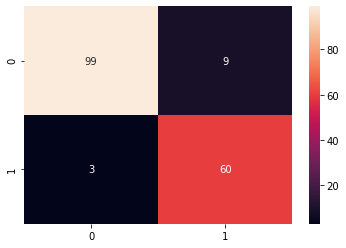

In [41]:

cm = confusion_matrix(y_test, thld)
sns.heatmap(cm, annot=True)


### Scoring

In [42]:
## Akurasi
accuracy_score(y_test, thld)

0.9298245614035088

## Save

In [43]:
import pickle
pickling_on = open("Breast_Cancer.pkl","wb")
pickle.dump(classifier, pickling_on)
pickling_on.close()

NN_model = pickle.load(open(r"Breast_Cancer.pkl", 'rb'))